In [77]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#import italy-covid-daywise.csv which
#contains day-wise Covid-19 data for Italy

italy_covid = pd.read_csv("italy-covid-daywise.csv")
italy_covid.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [79]:
# retrieve the number of rows
# and columns in the data frame
italy_covid

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [80]:
#view statistical information for numerical columns
italy_covid.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [81]:
# view some basic information about the data frame like data types, and number of non-nulls
italy_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [82]:
#create a list of columns
#within the data frame
lista =italy_covid.columns
lista

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [83]:
#return only the days which had more than 1000 reported cases
italy_covid[italy_covid['new_cases']>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [84]:
#create positive_rate column
#that is equal to new_cases / new_tests
italy_covid['positive_rate'] = italy_covid['new_cases']/italy_covid['new_tests']

In [85]:
italy_covid.head()

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN


In [86]:
#let's remove the positive_rate column
italy_covid.drop(columns=["positive_rate"], inplace=True)
italy_covid.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [87]:
#sort to identify the days
#with the highest number of cases
italy_covid.sort_values(by=["new_cases"], inplace=True, ascending= False)
italy_covid

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [88]:
#check the data type of date column,
#then convert it into a datetime
italy_covid.dtypes

date           object
new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

In [89]:
pd.to_datetime(italy_covid["date"])

82    2020-03-22
87    2020-03-27
81    2020-03-21
89    2020-03-29
88    2020-03-28
         ...    
28    2020-01-28
30    2020-01-30
32    2020-02-01
33    2020-02-02
172   2020-06-20
Name: date, Length: 248, dtype: datetime64[ns]

In [97]:
# extract different parts
# (day, month, weekday, and year) of the date column into separate columns
italy_covid[["year","month","day"]] = italy_covid["date"].str.split("-", expand=True)

In [98]:
italy_covid.head()

,date,new_cases,new_deaths,new_tests,year,month,day
82,2020-03-22,6557.0,795.0,NaN,2020,03,22
87,2020-03-27,6153.0,660.0,NaN,2020,03,27
81,2020-03-21,5986.0,625.0,NaN,2020,03,21
89,2020-03-29,5974.0,887.0,NaN,2020,03,29
88,2020-03-28,5959.0,971.0,NaN,2020,03,28


In [101]:
# check the overall metrics
# for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')
italy_covid[italy_covid['month']=="05"].describe()

,new_cases,new_deaths,new_tests
count,31.000000,31.000000,31.000000
mean,937.838710,182.516129,34797.419355
std,458.224843,91.088188,7403.552952
min,300.000000,50.000000,13665.000000
25%,617.500000,118.000000,31307.500000
50%,802.000000,165.000000,37049.000000
75%,1274.000000,239.000000,40032.000000
max,1965.000000,474.000000,45428.000000


In [102]:
# which day seems like have more cases?
italy_covid.sort_values(by=["new_cases"], ascending= False).head(1)


,date,new_cases,new_deaths,new_tests,year,month,day
82,2020-03-22,6557.0,795.0,NaN,2020,03,22


In [109]:
# create a new dataframe with
# month-wise data
month_wise_data = italy_covid [["new_cases","new_deaths","new_tests","month"]].groupby("month").describe()

In [110]:
month_wise_data.head()

new_cases                                                             \
          count         mean          std     min     25%     50%      75%   
month                                                                        
01         31.0     0.096774     0.538816     0.0     0.0     0.0     0.00   
02         29.0    30.517241    66.312906     0.0     0.0     0.0    14.00   
03         31.0  3253.258065  2126.719931   240.0  1112.0  3497.0  5233.00   
04         30.0  3395.066667   902.348313  1739.0  2682.5  3430.5  4082.25   
05         31.0   937.838710   458.224843   300.0   617.5   802.0  1274.00   

              new_deaths              ...               new_tests  \
          max      count        mean  ...    75%    max     count   
month                                 ...                           
01        3.0       31.0    0.000000  ...    0.0    0.0       0.0   
02      250.0       29.0    0.724138  ...    0.0    5.0       0.0   
03     6557.0       31.0  373.225806  ...  654.5  971.0       0.0   
04     4805.0       30.0  536.366667  ...  610.0  839.0      11.0   
05     1965.0       31.0  182.516129  ...  239.0  474.0      31.0   

                                                                                
               mean           std      min      25%      50%      75%      max  
month                                                                           
01              NaN           NaN      NaN      NaN      NaN      NaN      NaN  
02              NaN           NaN      NaN      NaN      NaN      NaN      NaN  
03              NaN           NaN      NaN      NaN      NaN      NaN      NaN  
04     38144.636364  21590.272945   7841.0  27386.5  37554.0  40058.5  95273.0  
05     34797.419355   7403.552952  13665.0  31307.5  37049.0  40032.0  45428.0  

[5 rows x 24 columns]

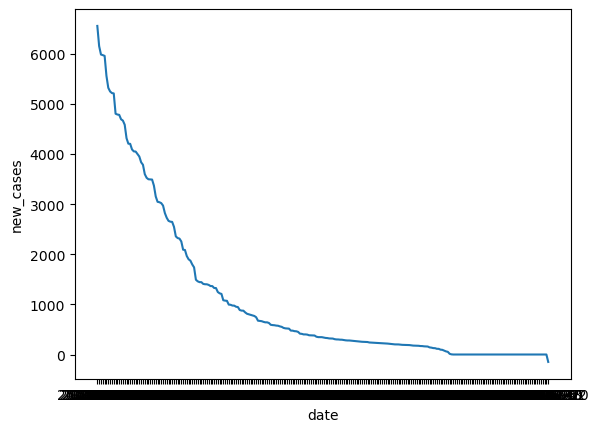

In [114]:
# plot a line graph showing
# how the number of daily cases varies over time.
sns.lineplot(y = italy_covid ["new_cases"],x = italy_covid ["date"]);